# New York Motor Vehicle Crash Analysis

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

# %matplotlib notebook


In [2]:
# set path
csv_path=os.path.join("Resources","Motor_Vehicle_Crashes_-_Case_Information__Three_Year_Window.csv")

# open csv
NY_crashes_df=pd.read_csv(csv_path)
NY_crashes_df.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Injury Accident,5:35,6/18/2014,Wednesday,Y,Dawn,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,None,Dry,NaN,"Crossing, No Signal or Crosswalk","Pedestrian, Collision With",1
1,2014,Property Damage Accident,15:28,11/6/2014,Thursday,Y,Daylight,HENRIETTA,RIGHT ANGLE,MONROE,Straight and Level,Rain,None,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage Accident,15:27,3/19/2014,Wednesday,Y,Daylight,CICERO,OVERTAKING,ONONDAGA,Straight and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2014,Property Damage Accident,4:03,6/23/2014,Monday,Y,Dark-Road Unlighted,COLESVILLE,OTHER,BROOME,Straight and Grade,Clear,None,Dry,88I91011017,Not Applicable,Deer,1
4,2014,Property Damage Accident,15:28,9/27/2014,Saturday,Y,Daylight,HECTOR,OTHER,SCHUYLER,Straight and Level,Cloudy,None,Dry,79 63061019,Not Applicable,Deer,1


In [3]:
# NY_crashes_df.dtypes

# Day of the week analysis

In [4]:
# convert object to datetime
NY_crashes_df['Datetime'] = NY_crashes_df['Date'] + ' '+ NY_crashes_df['Time']
NY_crashes_df.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved,Datetime
0,2014,Injury Accident,5:35,6/18/2014,Wednesday,Y,Dawn,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,None,Dry,NaN,"Crossing, No Signal or Crosswalk","Pedestrian, Collision With",1,6/18/2014 5:35
1,2014,Property Damage Accident,15:28,11/6/2014,Thursday,Y,Daylight,HENRIETTA,RIGHT ANGLE,MONROE,Straight and Level,Rain,None,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2,11/6/2014 15:28
2,2014,Property Damage Accident,15:27,3/19/2014,Wednesday,Y,Daylight,CICERO,OVERTAKING,ONONDAGA,Straight and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2,3/19/2014 15:27
3,2014,Property Damage Accident,4:03,6/23/2014,Monday,Y,Dark-Road Unlighted,COLESVILLE,OTHER,BROOME,Straight and Grade,Clear,None,Dry,88I91011017,Not Applicable,Deer,1,6/23/2014 4:03
4,2014,Property Damage Accident,15:28,9/27/2014,Saturday,Y,Daylight,HECTOR,OTHER,SCHUYLER,Straight and Level,Cloudy,None,Dry,79 63061019,Not Applicable,Deer,1,9/27/2014 15:28


In [5]:
#NY_crashes_df['Time']=pd.to_datetime(NY_crashes_df['Time'], format='%H:%M', errors='ignore')
#NY_crashes_df['Date']=pd.to_datetime(NY_crashes_df['Date'], format='%m/%d/%Y', errors='ignore')
NY_crashes_df['Datetime']=pd.to_datetime(NY_crashes_df['Datetime'], format='%m/%d/%Y %H:%M', errors='ignore')

In [6]:
NY_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895916 entries, 0 to 895915
Data columns (total 19 columns):
Year                             895916 non-null int64
Crash Descriptor                 895916 non-null object
Time                             895916 non-null object
Date                             895916 non-null object
Day of Week                      895916 non-null object
Police Report                    895916 non-null object
Lighting Conditions              895916 non-null object
Municipality                     883939 non-null object
Collision Type Descriptor        895916 non-null object
County Name                      895916 non-null object
Road Descriptor                  895916 non-null object
Weather Conditions               895916 non-null object
Traffic Control Device           895916 non-null object
Road Surface Conditions          895916 non-null object
DOT Reference Marker Location    313601 non-null object
Pedestrian Bicyclist Action      895916 non-null o

In [7]:
# count the crashes per day for each year 
gr_NY_crashes_df = NY_crashes_df.groupby(['Year','Day of Week'])['Date'].agg(['count'])
gr_NY_crashes_df

count
Year Day of Week       
2014 Friday       49259
     Monday       42866
     Saturday     39891
     Sunday       32908
     Thursday     45444
     Tuesday      43480
     Wednesday    45604
2015 Friday       48334
     Monday       42205
     Saturday     39002
     Sunday       34147
     Thursday     44245
     Tuesday      43163
     Wednesday    43460
2016 Friday       50088
     Monday       43522
     Saturday     39804
     Sunday       33653
     Thursday     45643
     Tuesday      45308
     Wednesday    43890

In [8]:


avg_day_crashes=gr_NY_crashes_df.groupby(['Year','Day of Week']).mean()
avg_day_crashes

count
Year Day of Week       
2014 Friday       49259
     Monday       42866
     Saturday     39891
     Sunday       32908
     Thursday     45444
     Tuesday      43480
     Wednesday    45604
2015 Friday       48334
     Monday       42205
     Saturday     39002
     Sunday       34147
     Thursday     44245
     Tuesday      43163
     Wednesday    43460
2016 Friday       50088
     Monday       43522
     Saturday     39804
     Sunday       33653
     Thursday     45643
     Tuesday      45308
     Wednesday    43890

In [9]:
# create a list for years
Years=avg_day_crashes.reset_index()['Year'].unique()
print(Years)    

[2014 2015 2016]


In [10]:
# add Total column to the dataframe
avg_day_crashes['Total']=np.nan

In [11]:
# loop over the dataframe and calculate the number of crashes for each year
for year in Years:
    Total=avg_day_crashes.loc[year]['count'].sum()
    print(Total)
    avg_day_crashes.loc[year,'Total']=Total

# avg_day_crashes


299452
294556
301908


In [12]:
# calculate the percentage for each day of the week
perc_day_crashes=(avg_day_crashes['count']/avg_day_crashes['Total'])*100
perc_day_crashes

Year  Day of Week
2014  Friday         16.449715
      Monday         14.314815
      Saturday       13.321334
      Sunday         10.989407
      Thursday       15.175721
      Tuesday        14.519856
      Wednesday      15.229152
2015  Friday         16.409104
      Monday         14.328345
      Saturday       13.240946
      Sunday         11.592702
      Thursday       15.020913
      Tuesday        14.653580
      Wednesday      14.754410
2016  Friday         16.590485
      Monday         14.415650
      Saturday       13.184149
      Sunday         11.146773
      Thursday       15.118182
      Tuesday        15.007221
      Wednesday      14.537541
dtype: float64

In [13]:
# convert to dataframe
perc_day_crashes_df=pd.DataFrame(perc_day_crashes, columns=['Percentage'])


In [14]:
# sort the data 
week_day_data=perc_day_crashes_df.sort_values(["Year","Percentage"], ascending=False).round(2)
week_day_data

Percentage
Year Day of Week            
2016 Friday            16.59
     Thursday          15.12
     Tuesday           15.01
     Wednesday         14.54
     Monday            14.42
     Saturday          13.18
     Sunday            11.15
2015 Friday            16.41
     Thursday          15.02
     Wednesday         14.75
     Tuesday           14.65
     Monday            14.33
     Saturday          13.24
     Sunday            11.59
2014 Friday            16.45
     Wednesday         15.23
     Thursday          15.18
     Tuesday           14.52
     Monday            14.31
     Saturday          13.32
     Sunday            10.99

# visualize the comparison for Years by day of the week

In [15]:
week_day_data.head()

Percentage
Year Day of Week            
2016 Friday            16.59
     Thursday          15.12
     Tuesday           15.01
     Wednesday         14.54
     Monday            14.42

In [16]:
#data muging to re-format the datafarame 
week_day_data_plot=week_day_data.reset_index().pivot(index='Day of Week',columns='Year',values='Percentage')
week_day_data_plot

Year,2014,2015,2016
Day of Week,,,
Friday,16.45,16.41,16.59
Monday,14.31,14.33,14.42
Saturday,13.32,13.24,13.18
Sunday,10.99,11.59,11.15
Thursday,15.18,15.02,15.12
Tuesday,14.52,14.65,15.01
Wednesday,15.23,14.75,14.54


Text(0.5, 1.0, 'Day of the week crashes')

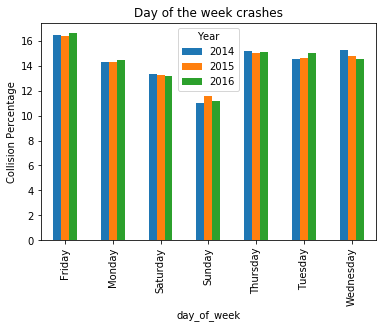

In [17]:
week_day_data_plot.plot(kind='bar')
labels=['Years', 'best']
plt.xlabel('day_of_week')
plt.ylabel('Collision Percentage')
plt.title('Day of the week crashes')


# crashesh druring the day

In [18]:
NY_crashes_df['Datetime'].dt.hour

0          5
1         15
2         15
3          4
4         15
          ..
895911    18
895912    16
895913    21
895914    19
895915    12
Name: Datetime, Length: 895916, dtype: int64

In [19]:
# create bins in which the crashes happend during the day
bins=[0,6,12,18,20,24]

#create label for the bins
#group_lable=["0 to 5","6 to 11","12 to 17","18 to 24", "20 to 24"]
group_label=["Early Morning", "Morning","Afternoon","Evening", "Night",]
NY_crashes_df['Crash Time'] = pd.cut(NY_crashes_df['Datetime'].dt.hour, bins=bins, labels=group_label)
NY_crashes_df.head()
    

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved,Datetime,Crash Time
0,2014,Injury Accident,5:35,6/18/2014,Wednesday,Y,Dawn,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,None,Dry,NaN,"Crossing, No Signal or Crosswalk","Pedestrian, Collision With",1,2014-06-18 05:35:00,Early Morning
1,2014,Property Damage Accident,15:28,11/6/2014,Thursday,Y,Daylight,HENRIETTA,RIGHT ANGLE,MONROE,Straight and Level,Rain,None,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2,2014-11-06 15:28:00,Afternoon
2,2014,Property Damage Accident,15:27,3/19/2014,Wednesday,Y,Daylight,CICERO,OVERTAKING,ONONDAGA,Straight and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2,2014-03-19 15:27:00,Afternoon
3,2014,Property Damage Accident,4:03,6/23/2014,Monday,Y,Dark-Road Unlighted,COLESVILLE,OTHER,BROOME,Straight and Grade,Clear,None,Dry,88I91011017,Not Applicable,Deer,1,2014-06-23 04:03:00,Early Morning
4,2014,Property Damage Accident,15:28,9/27/2014,Saturday,Y,Daylight,HECTOR,OTHER,SCHUYLER,Straight and Level,Cloudy,None,Dry,79 63061019,Not Applicable,Deer,1,2014-09-27 15:28:00,Afternoon


In [20]:
#pd.to_datetime(NY_crashes_df['Time'], format='%H:%M', errors='ignore')

In [21]:
#NY_crashes_df['Time']=pd.to_datetime(NY_crashes_df['Time'], format='%H:%M', errors='ignore')

In [22]:
#df1.groupby(["Name", "City"]).size().reset_index(name='count')

gr_NY_crashes_time_df = NY_crashes_df.groupby(['Year','Crash Time'])['Date'].agg(['count']).reset_index()
gr_NY_crashes_time_df

,Year,Crash Time,count
0,2014,Early Morning,27303
1,2014,Morning,89209
2,2014,Afternoon,118728
3,2014,Evening,24954
4,2014,Night,24893
5,2015,Early Morning,26365
6,2015,Morning,88439
7,2015,Afternoon,119208
8,2015,Evening,24032
9,2015,Night,22673


In [23]:
gr_NY_crashes_time_df['Percentage'] = (gr_NY_crashes_time_df['count']/Total * 100).round(2)


#perc_crash_time=(gr_NY_crashes_time_df['count']/Total)*100
#perc_crash_time

gr_NY_crashes_time_df

,Year,Crash Time,count,Percentage
0,2014,Early Morning,27303,9.04
1,2014,Morning,89209,29.55
2,2014,Afternoon,118728,39.33
3,2014,Evening,24954,8.27
4,2014,Night,24893,8.25
5,2015,Early Morning,26365,8.73
6,2015,Morning,88439,29.29
7,2015,Afternoon,119208,39.48
8,2015,Evening,24032,7.96
9,2015,Night,22673,7.51


In [24]:
# perc_crash_time_plot=perc_crash_time_df.reset_index().drop(columns=['Day of Week']).set_index('Year')

# perc_crash_time_plot


In [25]:
gr_NY_crashes_time_df_plot=gr_NY_crashes_time_df.pivot(index='Crash Time',columns='Year',values='Percentage')
gr_NY_crashes_time_df_plot

Year,2014,2015,2016
Crash Time,,,
Early Morning,9.04,8.73,9.28
Morning,29.55,29.29,29.74
Afternoon,39.33,39.48,40.22
Evening,8.27,7.96,8.31
Night,8.25,7.51,7.96


Text(0.5, 1.0, 'Crash Time')

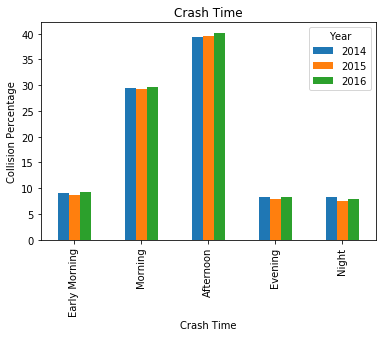

In [31]:
gr_NY_crashes_time_df_plot.plot(kind='bar')
labels=['Years', 'best']
#group_lable=["0 to 5","6 to 11","12 to 17","18 to 24", "20 to 24"]
# group_label=["Early Morning", "Morning","Afternoon","Evening", "Night",]
plt.xlabel('Crash Time')
plt.ylabel('Collision Percentage')
plt.title('Crash Time')

# month of the day crashes analysis

In [26]:
NY_crashes_m=pd.to_datetime(NY_crashes_df['Date'], format='%m/%d/%Y', errors='ignore')
# NY_crashes_m

In [27]:
gr_NY_crashes_month_df = NY_crashes_df.groupby(['Year','Date'])['Date'].agg(['count'])
gr_NY_crashes_month_df

count
Year Date            
2014 1/1/2014     608
     1/10/2014   1477
     1/11/2014    816
     1/12/2014    467
     1/13/2014    820
...               ...
2016 9/5/2016     546
     9/6/2016     901
     9/7/2016     847
     9/8/2016     871
     9/9/2016     886

[1096 rows x 1 columns]

In [28]:
month_name_df=gr_NY_crashes_month_df.reset_index()
month_name_df

,Year,Date,count
0,2014,1/1/2014,608
1,2014,1/10/2014,1477
2,2014,1/11/2014,816
3,2014,1/12/2014,467
4,2014,1/13/2014,820
...,...,...,...
1091,2016,9/5/2016,546
1092,2016,9/6/2016,901
1093,2016,9/7/2016,847
1094,2016,9/8/2016,871
